In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from toolz import partial
from scipy.stats import entropy
from aging.plotting import format_plots, PlotConfig, save_factory, figure, legend, LONGTOGENY_AGE_CMAP

In [2]:
format_plots()
c = PlotConfig()
saver = save_factory(c.save_path / "longtogeny-characterization", tight_layout=False)

In [3]:
def load_long_df(version=5):
    usage_mtx = pd.read_parquet(
        f"/n/groups/datta/win/longtogeny/data/ontogeny/version_{version:02d}/longtogeny_males_clean.parquet"
    )
    return usage_mtx

In [28]:
df = load_long_df(version=5)
df = df.query('age < 600')

keep_sylls = df.columns[df.median() > 0.005]
df = df[keep_sylls]

index = ['age', 'mouse', 'cage', 'uuid', 'subject_name', 'date']

index = ['binned_age'] + index
ages = df.index.get_level_values('age')
lbls, bins = pd.qcut(ages, 16, labels=False, retbins=True)

df['binned_age'] = lbls
df = df.reset_index().set_index(index)
binned_ages = df.groupby(['binned_age', 'mouse', 'cage']).mean()

In [29]:
entropy_df = (binned_ages + 1e-6).apply(entropy, axis=1)
entropy_df.name = 'entropy'
entropy_df = entropy_df.reset_index()

In [32]:
entropy_df['age'] = entropy_df['binned_age'].map(dict(enumerate((bins[:-1] + bins[1:]) / 2 / 7)))

In [40]:
entropy_df.groupby('age')['entropy'].count()

age
3.303571     16
3.946429     16
5.357143     16
7.642857     16
9.857143     16
11.642857    16
13.857143    16
16.785714    16
20.357143    16
25.428571    16
30.500000    16
36.642857    15
47.303571    13
56.303571    15
62.214286    14
68.000000    14
Name: entropy, dtype: int64

In [41]:
entropy_df.columns

Index(['binned_age', 'mouse', 'cage', 'entropy', 'age'], dtype='object')

[Text(0.5, 0, 'Age (weeks)')]

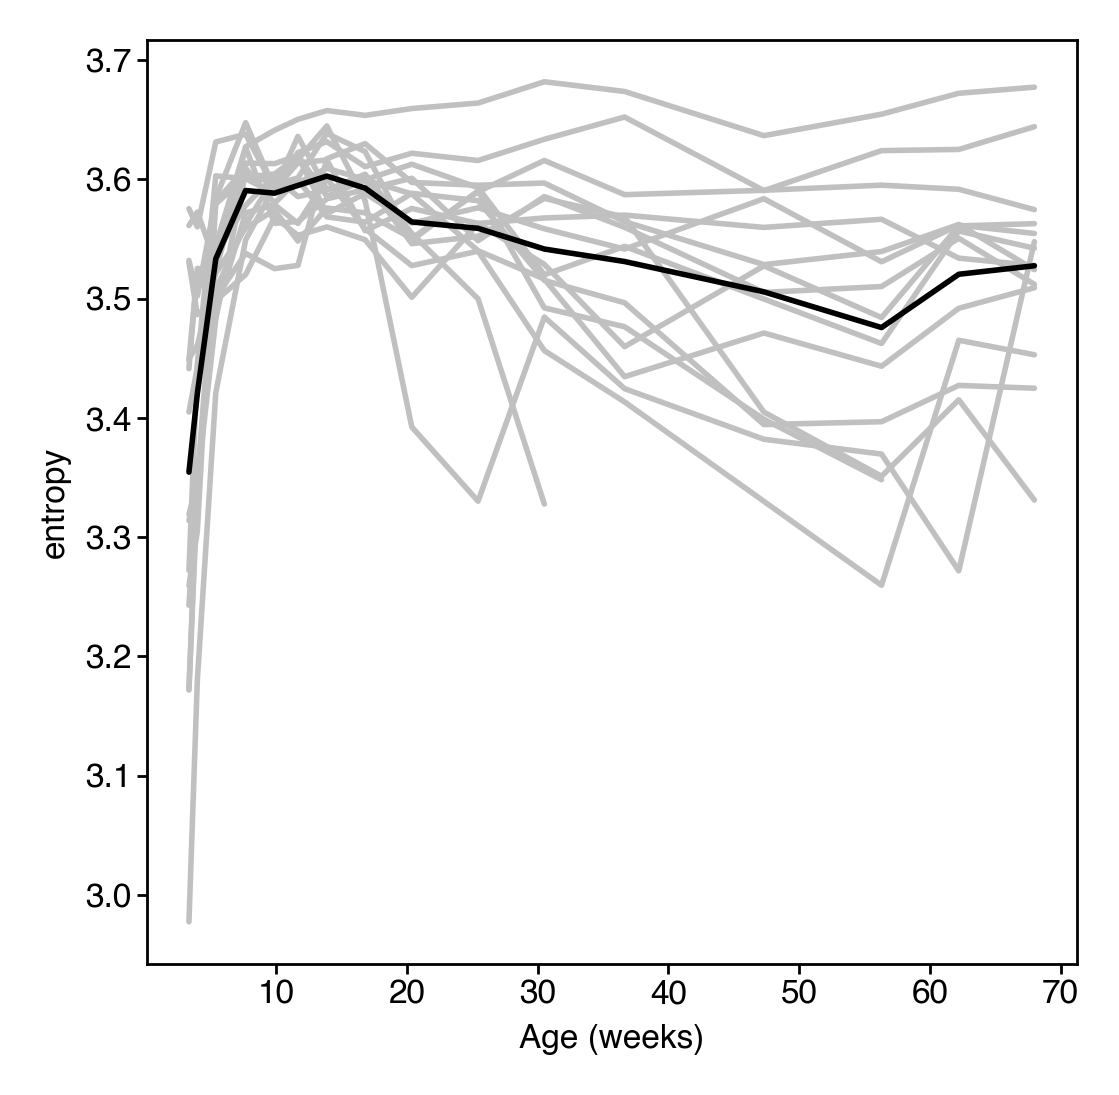

In [51]:
ax = sns.lineplot(
    data=entropy_df.reset_index(),
    x="age",
    y="entropy",
    errorbar="se",
    hue="mouse",
    legend=False,
    palette=['silver'] * 16,
)
ax = sns.lineplot(
    data=entropy_df.reset_index(),
    x="age",
    y="entropy",
    errorbar=None,
    color='k',
)
ax.set(xlabel="Age (weeks)")